# DI 6.4 - Machine Learning Regression

## This script contains the following
#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. Data Prep for Regression Analysis
#### 4. Regresssion Analysis

#### Bonus: Performance Improvement after removing outliers

### 1. Importing Libraries and Data

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
GADS = pd.read_pickle(r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis\02 Data\Prepared Data\GADS_6.3.pkl')

In [7]:
path = r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis'

In [8]:
path

'D:\\Career Foundry\\2) Data Immersion\\6) Advanced Analytics & Dashboard Design\\DI 6 - Jupyter Folder\\EMPRES Global Animal Disease Surveillance Analysis'

### 2. Data Cleaning

In [10]:
GADS.columns

Index(['ID', 'Latitude', 'Longitude', 'Region', 'Country', 'City/Providence',
       'Locality', 'LocalityQuality', 'Observe Date', 'Report Date', 'Status',
       'Disease', 'Serotypes', 'Sp. Description', 'Sum Sp.AtRisk',
       'Sum Sp.Cases', 'Sum Sp.Deaths', 'Sum Sp.Destroyed',
       'Sum Sp.Slaughtered', 'Humans Gender', 'Humans Age', 'Humans Affected',
       'Humans Deaths'],
      dtype='object')

In [11]:
GADS.head()

,ID,Latitude,Longitude,Region,Country,City/Providence,Locality,LocalityQuality,Observe Date,Report Date,...,Sp. Description,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Gender,Humans Age,Humans Affected,Humans Deaths
0,230399,-27.900000,30.800000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,22/08/2017,...,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,nan,0.0,0.0,0.0
1,230381,54.837037,73.354155,Europe,Russian Federation,Omskaya Oblast,Novaya Stanica,Exact,16/08/2017,18/08/2017,...,"domestic, swine",122.0,6.0,1.0,0.0,0.0,nan,0.0,0.0,0.0
2,230333,-21.077740,30.211620,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,16/08/2017,...,"domestic, cattle",1283.0,112.0,0.0,0.0,7.0,nan,0.0,0.0,0.0
3,230396,-26.000000,28.300000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,22/08/2017,...,"wild, unspecified bird",0.0,1.0,1.0,0.0,0.0,nan,0.0,0.0,0.0
4,230371,49.237900,17.700200,Europe,Czech Republic,Jihomoravsky,Hvozdná,Exact,15/08/2017,17/08/2017,...,"wild, wild boar",0.0,1.0,1.0,0.0,0.0,nan,0.0,0.0,0.0


In [12]:
GADS.shape

(17008, 23)

In [13]:
# No columns need to be renamed or dropped.

##### Missing Values

In [15]:
# Checking for Missing Values

GADS.isnull().sum()

ID                    0
Latitude              0
Longitude             0
Region                0
Country               0
City/Providence       0
Locality              0
LocalityQuality       0
Observe Date          0
Report Date           0
Status                0
Disease               0
Serotypes             0
Sp. Description       0
Sum Sp.AtRisk         0
Sum Sp.Cases          0
Sum Sp.Deaths         0
Sum Sp.Destroyed      0
Sum Sp.Slaughtered    0
Humans Gender         0
Humans Age            0
Humans Affected       0
Humans Deaths         0
dtype: int64

In [16]:
# No missing values

##### Duplicates Check

In [18]:
dups = GADS.duplicated()

In [19]:
dups.shape

(17008,)

In [20]:
# No duplicates

##### Extreme Values Check

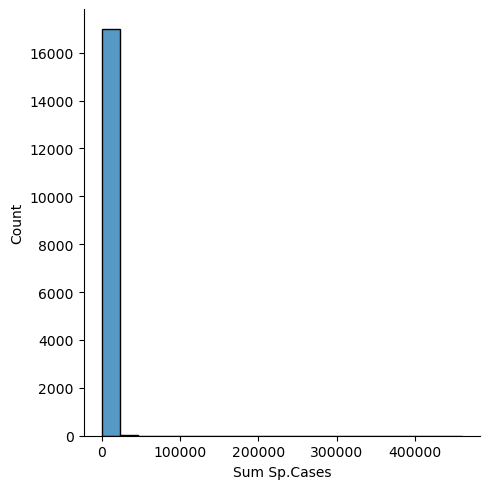

In [82]:
sns.displot(GADS['Sum Sp.Cases'], bins = 20) # Shows extreme values
plt.show()

# Some of the outliers in the high values may need to be removed, but let's try without doing so first

In [84]:
GADS['Sum Sp.Cases'].mean() # Checks the mean

280.46448730009405

In [86]:
GADS['Sum Sp.Cases'].median() # Checks the median

1.0

In [88]:
GADS['Sum Sp.Cases'].max() # Checks the max

460000.0

### 3. Data Prep for Regression Analysis

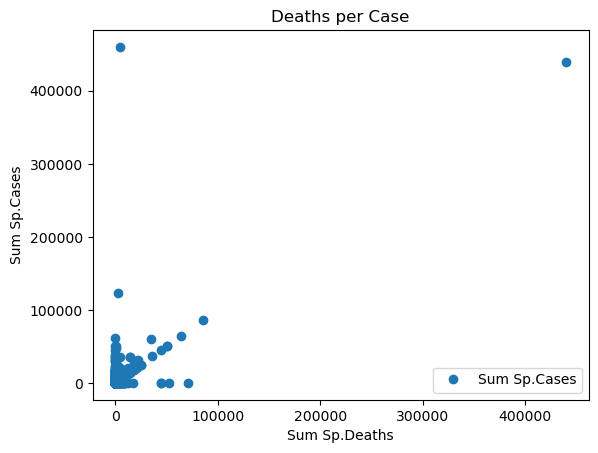

In [112]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

GADS.plot(x = 'Sum Sp.Deaths', y='Sum Sp.Cases',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Deaths per Case')
plt.xlabel('Sum Sp.Deaths')  
plt.ylabel('Sum Sp.Cases')
plt.show()

In [114]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = GADS['Sum Sp.Deaths'].values.reshape(-1,1)
y = GADS['Sum Sp.Cases'].values.reshape(-1,1)

In [116]:
X

array([[12.],
       [ 1.],
       [ 0.],
       ...,
       [ 0.],
       [ 0.],
       [ 0.]])

In [118]:
y

array([[ 12.],
       [  6.],
       [112.],
       ...,
       [  0.],
       [  0.],
       [  0.]])

In [120]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regresssion Analysis

In [123]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [125]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [127]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

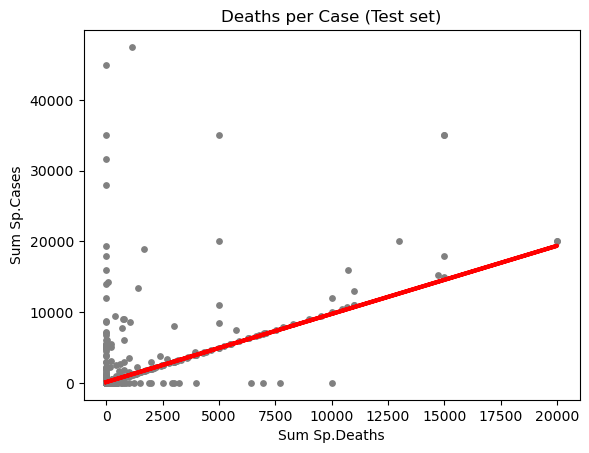

In [129]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Deaths per Case (Test set)')
plot_test.xlabel('Sum Sp.Deaths')
plot_test.ylabel('Sum Sp.Cases')
plot_test.show()

In [214]:
plt.savefig("Deaths per Case (test set 1).png")

In [131]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [133]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.96366538]]
Mean squared error:  2488447.984714434
R2 score:  0.3338907923665807


In [135]:
y_predicted

array([[119.38817916],
       [119.38817916],
       [137.69782145],
       ...,
       [119.38817916],
       [148.29814066],
       [120.35184454]])

In [137]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,119.388179
1,0.0,119.388179
2,27.0,137.697821
3,1.0,120.351845
4,1.0,120.351845
5,0.0,119.388179
6,1.0,119.388179
7,1.0,119.388179
8,23.0,119.388179
9,1.0,120.351845


##### Compare how the regression fits the training set

In [140]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [142]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [144]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.96366538]]
Mean squared error:  21488936.394771505
R2 score:  0.4600353810270341


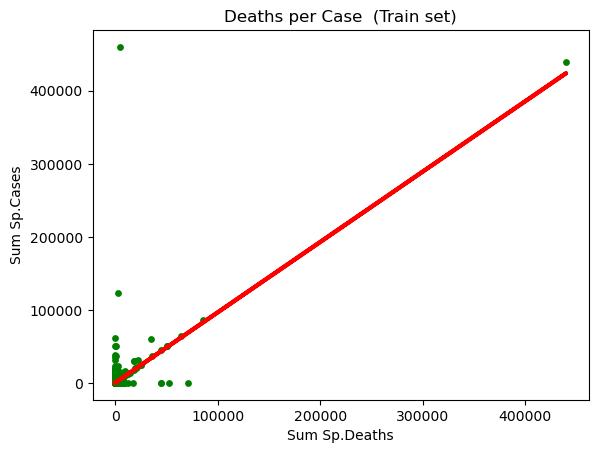

In [146]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Deaths per Case  (Train set)')
plot_test.xlabel('Sum Sp.Deaths')
plot_test.ylabel('Sum Sp.Cases')
plot_test.show()

In [216]:
plt.savefig("Deaths per Case (train set 1).png")

### Bonus: Performance Improvement after removing outliers

In [192]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

GADS_test = GADS[GADS['Sum Sp.Cases'] <=51049] 

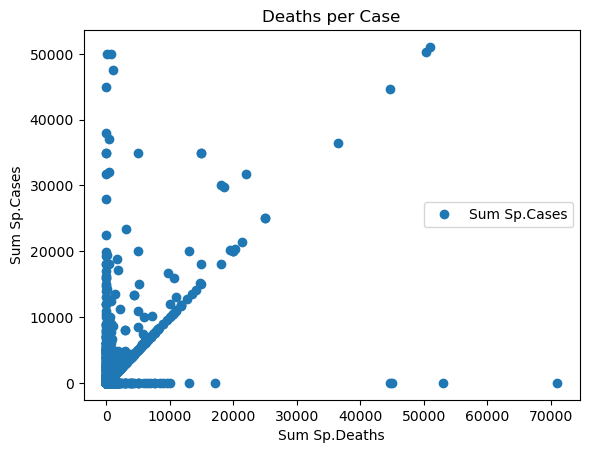

In [194]:
# See how the scatterplot looks without outliers.

GADS_test.plot(x = 'Sum Sp.Deaths', y='Sum Sp.Cases', style='o')  
plt.title('Deaths per Case')  
plt.xlabel('Sum Sp.Deaths')  
plt.ylabel('Sum Sp.Cases')  
plt.show()

In [218]:
plt.savefig("Deaths per Case (test).png")

In [196]:
# Reshape again.

X_2 = GADS_test['Sum Sp.Deaths'].values.reshape(-1,1)
y_2 = GADS_test['Sum Sp.Cases'].values.reshape(-1,1)

In [198]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [200]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [202]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [204]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [206]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.53929212]]
Mean squared error:  2817198.0483201174
R2 score:  0.32324030722302144


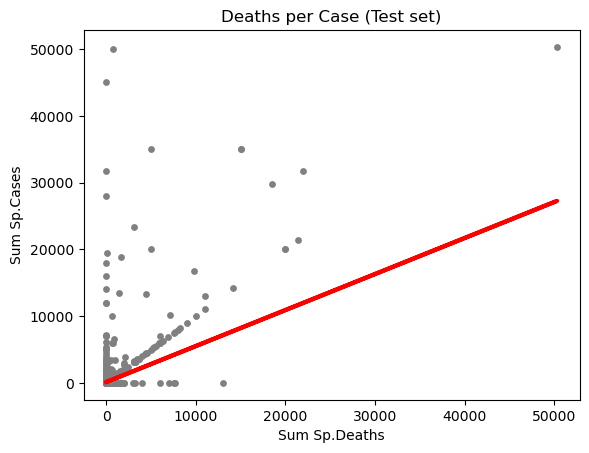

In [208]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Deaths per Case (Test set)')
plot_test.xlabel('Sum Sp.Deaths')
plot_test.ylabel('Sum Sp.Cases')
plot_test.show()

In [220]:
plt.savefig("Deaths per Case (train).png")

In [210]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,50.0,151.917542
1,0.0,124.952936
2,1.0,125.492228
3,1.0,125.492228
4,1.0,124.952936
5,5.0,124.952936
6,1.0,125.492228
7,10.0,124.952936
8,0.0,124.952936
9,1.0,125.492228


##### When addressing the regression I've plotting using Sp.Deaths as my dependent(X) an Sp.Cases as my independent(y) we have a unique regression line. When looking at the statistics the regression coefficient is 0.539, it's not quite zero but it's not negative or a large positive. This tells me that my X (Sp.Deaths) rises but the y (Sp.Cases) stay the same. The mean squared error is 2817198, a very large value. This states that my regression line is very far from my plots. Making it a poor representation of the data. The R2 value (0.323) would also indicate that there is low making it a poor fit for the data. Even observing the values compared to their predictive values shows a large difference. It's safe to say that this predictive model doesn't follow a straight regression and it's inaccurate. We can infer that the amount of cases don't directly correlate with the amount of logged animal deaths. 

##### Exporting (pickle)

In [228]:
GADS.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'GADS_6.4.pkl'))